In [1]:


from keras.datasets import imdb

In [2]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

#x_test = test_data

17464789/17464789 [==============================] - 3s 0us/step


In [3]:
train_data.shape

(25000,)

In [4]:
train_labels[0]

1

In [5]:
word_index=imdb.get_word_index()
reverse_word_index=dict([value,key] for (key,value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
#prepare the data
import numpy as np

In [8]:
#perform one_hot vector encoding
def vectorize(sequences,dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [9]:
x_train=vectorize(train_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
#building the network
from keras import models
from keras import layers

In [13]:
model = models.Sequential()

In [14]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [15]:
#compilation step 
#from keras import util.custom_object_scope
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
#validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [17]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
#fit the model
history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.5544 - accuracy: 0.7607 - val_loss: 0.4264 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3509 - accuracy: 0.8905 - val_loss: 0.3294 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2638 - accuracy: 0.9131 - val_loss: 0.2977 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2120 - accuracy: 0.9315 - val_loss: 0.2819 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1759 - accuracy: 0.9427 - val_loss: 0.2754 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1481 - accuracy: 0.9530 - val_loss: 0.2781 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1280 - accuracy: 0.9591 - val_loss: 0.2906 - val_accuracy: 0.8820
Epoch 8/20
3

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']

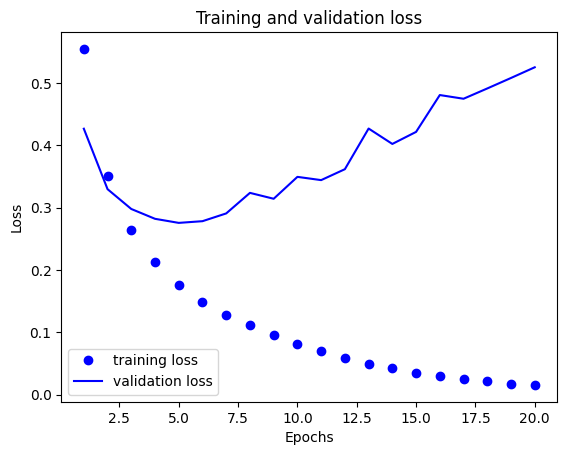

In [22]:
#plotting training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

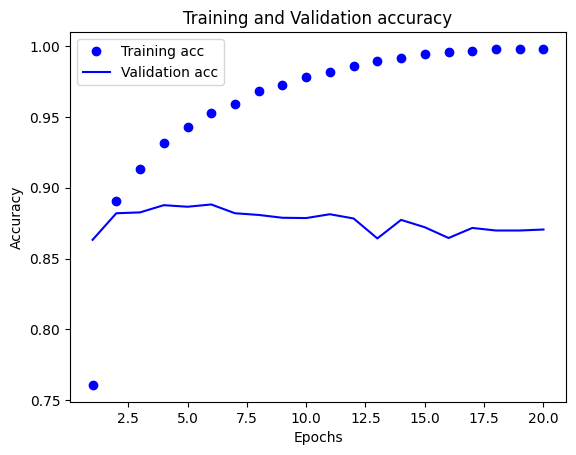

In [23]:
plt.clf()
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [24]:
import numpy as np
#result = model.predict(test_data)
print(np.mean(history_dict['accuracy']))
#print(history_dict)

0.9599833369255066


In [25]:
#Out put analysis,
#[0.9865479] is a single prediction value for a particular input sample in the test data. 
#It is the predicted probability of the positive sentiment class (class 1) for that input.
#Since the output activation function of the last layer of the model is sigmoid, which maps the predicted values to a range of [0,1]
#,the output values represent the probabilities of the positive class. 
#In this case, the probability of the positive class for the given input sample is 0.9865479, which is very close to 1, indicating that the model is highly confident in predicting the positive class for that input.